In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Healthcare-Diabetes.csv")

In [5]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df=df.drop(columns=["Id"])

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

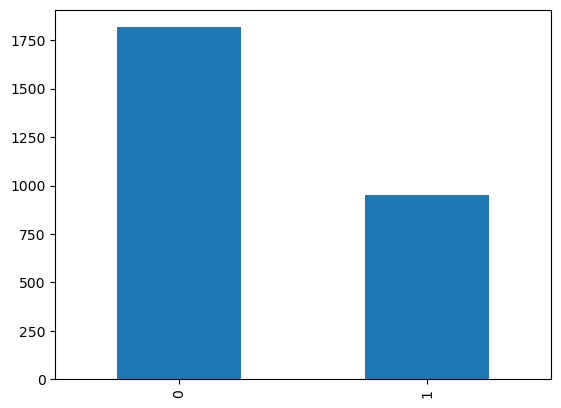

In [11]:
df.Outcome.value_counts().plot.bar()

In [10]:
import seaborn as sns

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

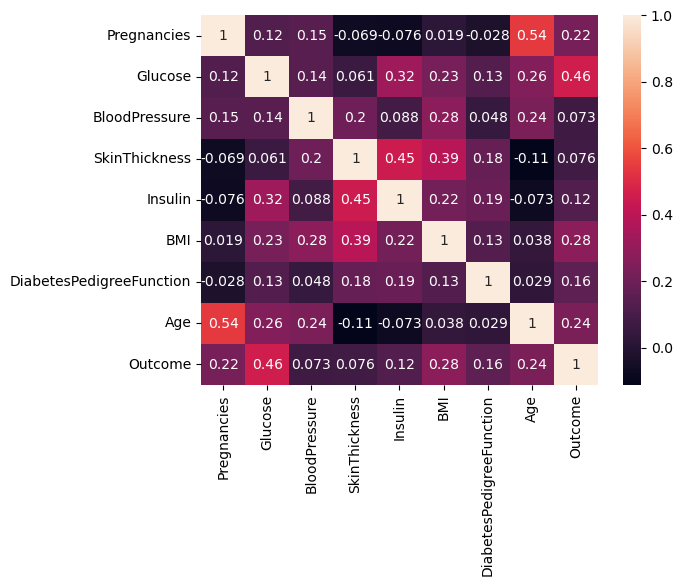

In [45]:
sns.heatmap(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(),annot=True)

In [12]:
correlation_with_outcome=df.corrwith(df['Outcome']).sort_values(ascending=False)

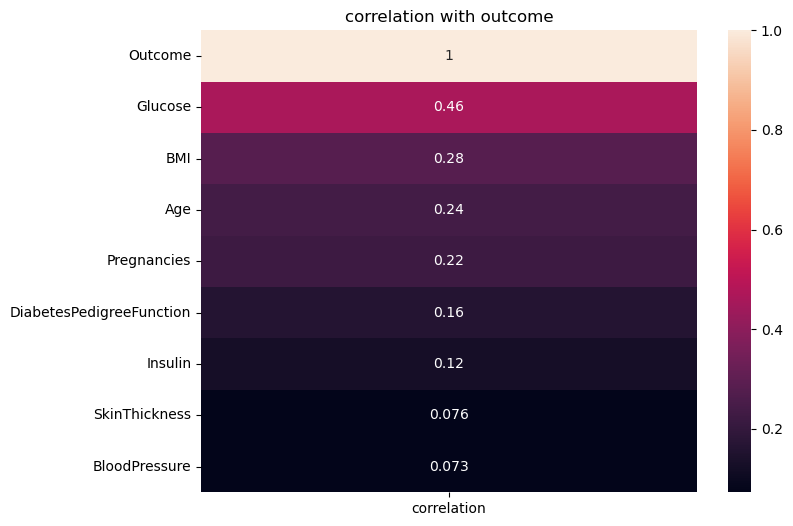

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(correlation_with_outcome,columns=['correlation']),annot=True)
plt.title('correlation with outcome')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Outcome'])
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       364
           1       0.91      0.92      0.91       190

    accuracy                           0.94       554
   macro avg       0.93      0.93      0.93       554
weighted avg       0.94      0.94      0.94       554



In [15]:
from sklearn.svm import SVC
svm_classifier=SVC()
svm_classifier.fit(x_train,y_train)
y_pred=svm_classifier.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       364
           1       0.67      0.47      0.55       190

    accuracy                           0.74       554
   macro avg       0.71      0.68      0.68       554
weighted avg       0.73      0.74      0.73       554



In [16]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       364
           1       0.98      0.99      0.99       190

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554



In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100,random_state=1)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       364
           1       1.00      0.98      0.99       190

    accuracy                           0.99       554
   macro avg       1.00      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554



In [23]:
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()
naive_bayes.fit(x_train,y_train)
y_pred=naive_bayes.predict(x_test)
print(classification_report(y_test,y_pred))
    

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       364
           1       0.63      0.58      0.60       190

    accuracy                           0.74       554
   macro avg       0.71      0.70      0.70       554
weighted avg       0.73      0.74      0.74       554

